In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data Set

In [5]:
data = pd.read_csv("data/housing.csv")

In [6]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## Penjelasan Atribut Data Set

1. **longitude**: Garis bujur
2. **latitude**: Garis lintang
3. **housingMedianAge**: Median usia rumah, angka yang lebih rendah menunjukkan bangunan yang lebih baru
4. **totalRooms**: Jumlah total ruangan
5. **totalBedrooms**: Jumlah total kamar tidur
6. **population**: Jumlah total penduduk yang tinggal
7. **households**: Jumlah kelompok orang yang tinggal dalam unit rumah
8. **medianIncome**: Pendapatan median rumah tangga (diukur dalam puluhan ribu Dolar AS)
9. **medianHouseValue**: Nilai median rumah (diukur dalam Dolar AS)
10. **oceanProximity**: Lokasi rumah terhadap laut/samudra

# Data Exploration

Cek apakah terdapat nilai null.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Terdapat 207 null di total_bedrooms.

Karena jumlah tidak signifikan, maka drop saja.

In [5]:
data.dropna(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


Split data menjadi training data dan testing data (X dan y)

In [7]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [8]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [9]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Join kembali X train data dengan y train data untuk menganalisis korelasi.

In [11]:
train_data = X_train.join(y_train)

In [12]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
8490,-118.29,33.90,27.0,1013.0,394.0,1067.0,400.0,1.7714,<1H OCEAN,159400.0
68,-122.30,37.81,52.0,572.0,109.0,274.0,82.0,1.8516,NEAR BAY,85000.0
18591,-122.13,36.97,27.0,991.0,194.0,543.0,155.0,4.7188,NEAR OCEAN,350000.0
12581,-121.42,38.52,32.0,2828.0,556.0,1655.0,485.0,2.5574,INLAND,72600.0
20291,-119.19,34.17,35.0,4276.0,767.0,3295.0,708.0,4.2583,NEAR OCEAN,187300.0
...,...,...,...,...,...,...,...,...,...,...
20183,-119.16,34.28,30.0,413.0,98.0,400.0,112.0,4.0000,NEAR OCEAN,219200.0
1762,-122.33,37.94,44.0,1769.0,332.0,828.0,309.0,4.0526,NEAR BAY,150800.0
13467,-117.39,34.12,7.0,5059.0,780.0,3253.0,801.0,4.9196,INLAND,140500.0
4054,-118.43,34.15,31.0,1856.0,425.0,795.0,426.0,2.8448,<1H OCEAN,360600.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

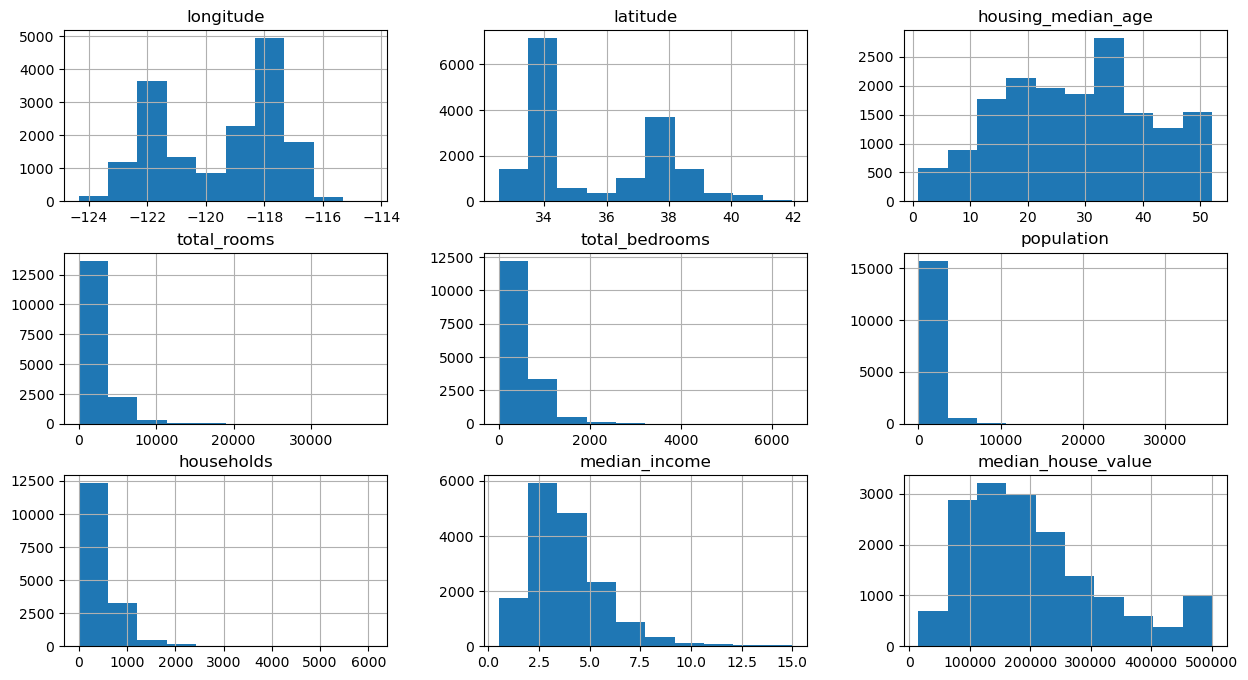

In [13]:
train_data.hist(figsize=(15,8))

Pakai heatmap untuk memvisualisasikan korelasi

<Axes: >

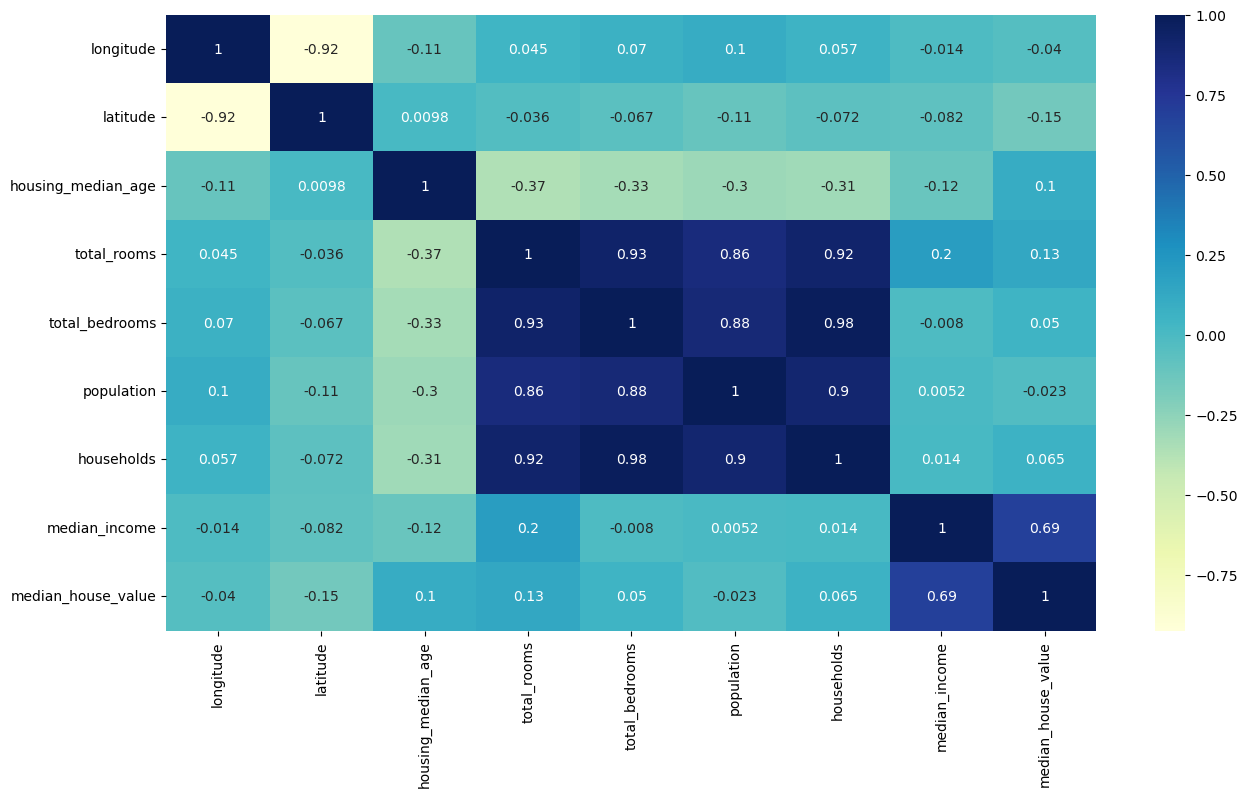

In [14]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

*median_income* berkorelasi kuat dengan *median_house_value*

*latitude* berkolerasi negatif dengan *median_house_value*

# Preprocessing

Terjadi kemiringan distribusi data pada fitur *total_rooms*, *total_bedrooms*, *population*, dan *households*.

Cek logaritma dari fitur-fitur tersebut dan lihat bagaimana distribusinya.

In [15]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

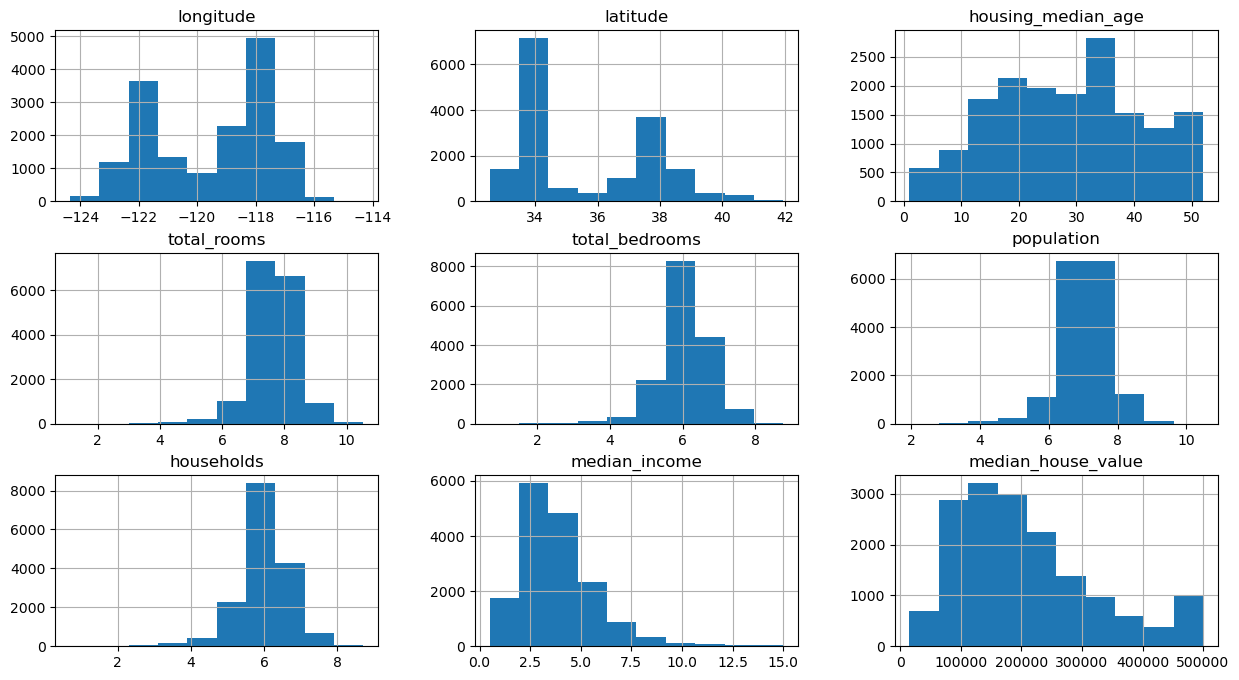

In [16]:
train_data.hist(figsize=(15,8))

Sudah normal distribution

Ubah fitur *ocean_proximity* menjadi fitur binary

In [17]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7205
INLAND        5227
NEAR OCEAN    2105
NEAR BAY      1805
ISLAND           4
Name: count, dtype: int64

In [18]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [19]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
8490,-118.29,33.90,27.0,6.921658,5.978886,6.973543,5.993961,1.7714,159400.0,True,False,False,False,False
68,-122.30,37.81,52.0,6.350886,4.700480,5.616771,4.418841,1.8516,85000.0,False,False,False,True,False
18591,-122.13,36.97,27.0,6.899723,5.273000,6.298949,5.049856,4.7188,350000.0,False,False,False,False,True
12581,-121.42,38.52,32.0,7.947679,6.322565,7.412160,6.186209,2.5574,72600.0,False,True,False,False,False
20291,-119.19,34.17,35.0,8.361007,6.643790,8.100465,6.563856,4.2583,187300.0,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20183,-119.16,34.28,30.0,6.025866,4.595120,5.993961,4.727388,4.0000,219200.0,False,False,False,False,True
1762,-122.33,37.94,44.0,7.478735,5.808142,6.720220,5.736572,4.0526,150800.0,False,False,False,True,False
13467,-117.39,34.12,7.0,8.529122,6.660575,8.087640,6.687109,4.9196,140500.0,False,True,False,False,False
4054,-118.43,34.15,31.0,7.526718,6.054439,6.679599,6.056784,2.8448,360600.0,True,False,False,False,False


Cek korelasi lagi, sekarang sudah bisa dengan mempertimbangkan *ocean_proximity*

<Axes: >

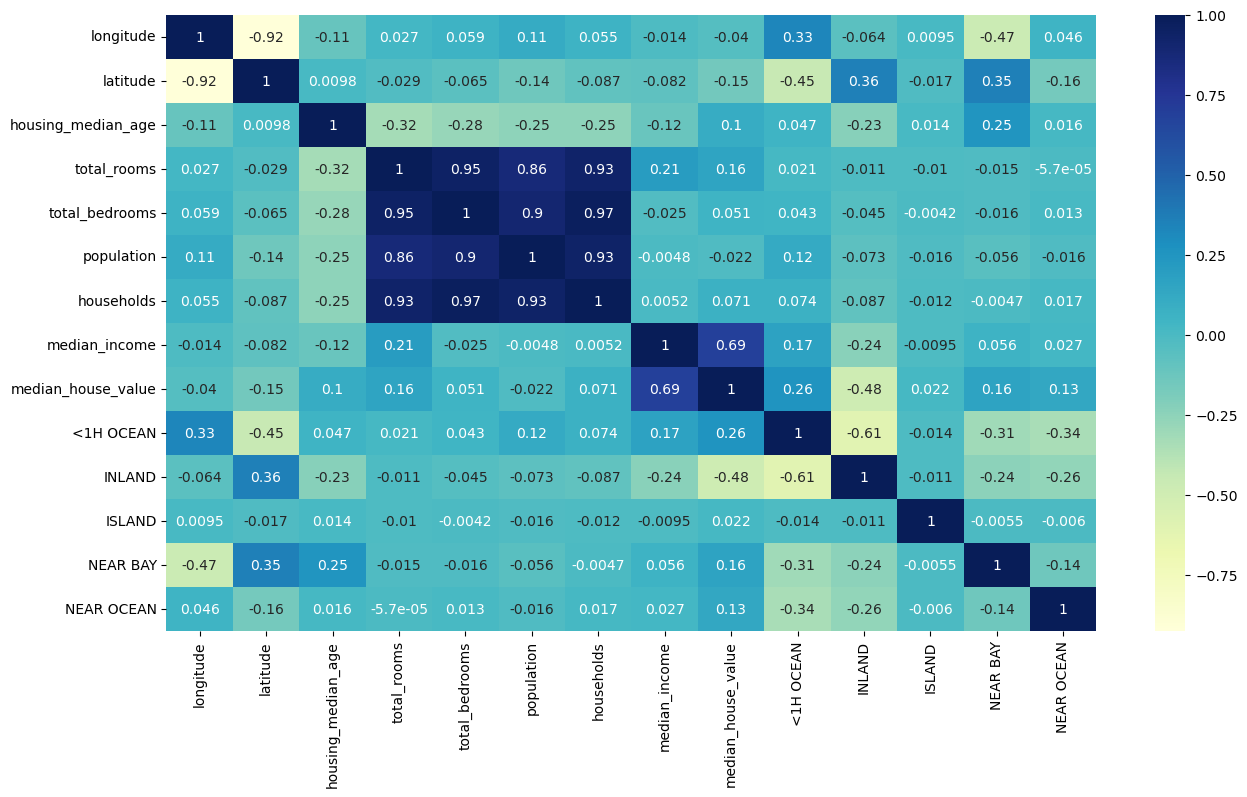

In [20]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

*median_house_value* memiliki korelasi negatif dengan *INLAND*, kebalikannya dengan *<1H OCEAN*

> Jika rumah berada dekat laut, biasanya memiiliki harga yang lebih tinggi.

<Axes: xlabel='latitude', ylabel='longitude'>

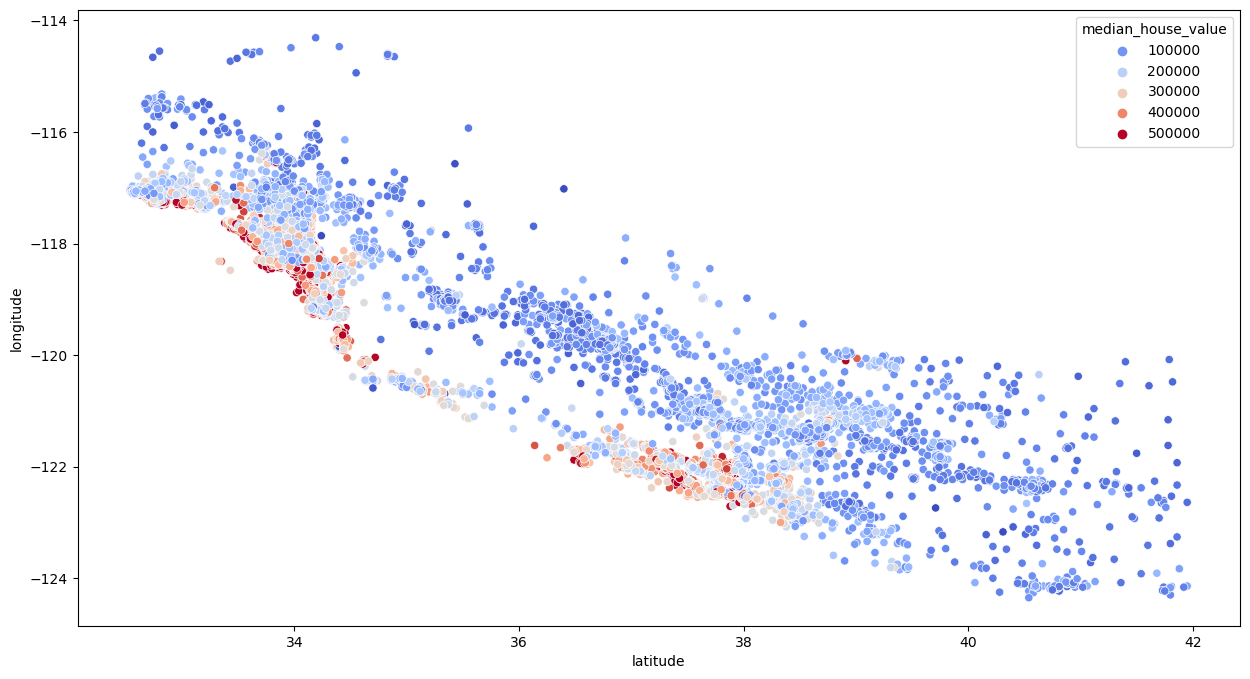

In [21]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")

Visualisasi bahwa rumah yang dekat dengan pesisir harganya lebih mahal

# Feature Engineering

Beberapa fitur yang ada bisa digabungkan untuk menjadi fitur baru yang berguna.

1. Seberapa rasio sebuah ruangan merupakan kamar tidur
2. Semakin banyak rumah tangga, maka semakin banyak pula membutuhkan ruangan => Seberapa ruangan untuk setiap rumah tangga.

In [22]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

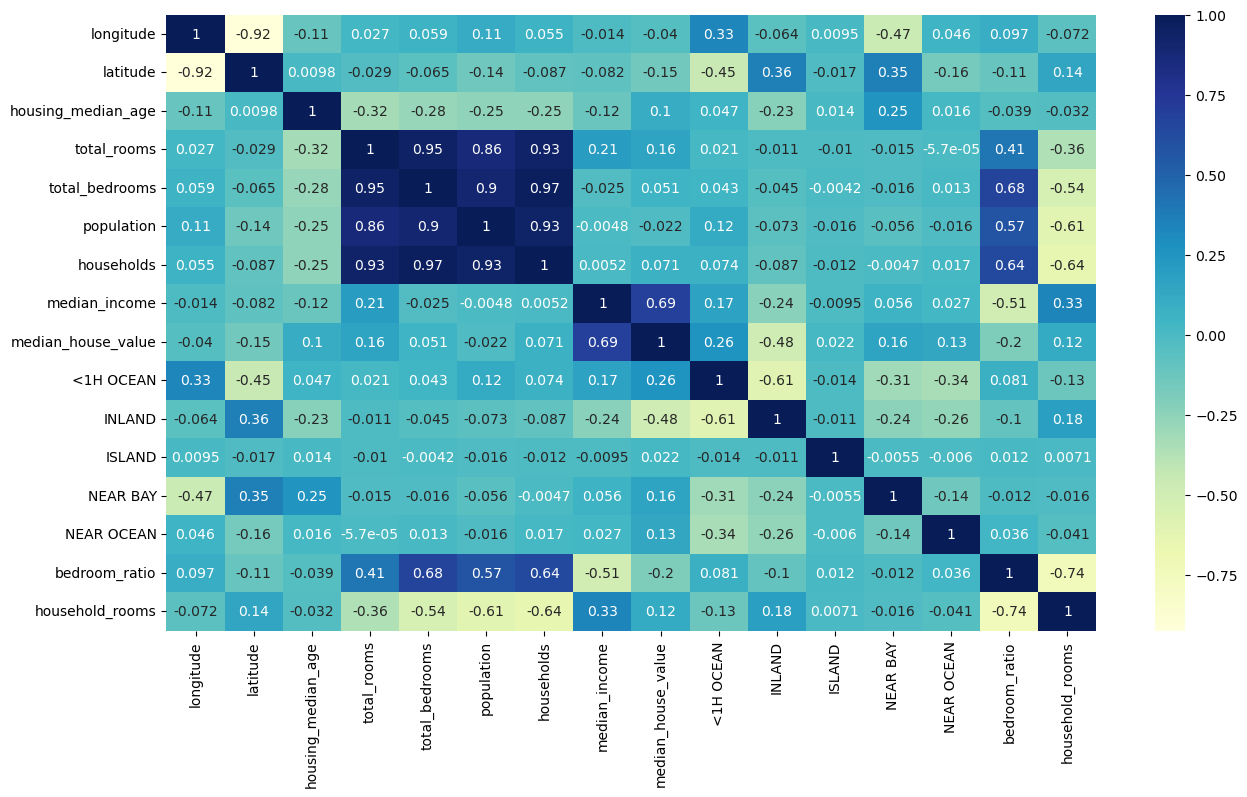

In [23]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

*bedroom_ratio* memiliki korelasi negatif dengan *median_house_value*

*household_rooms* juga terlihat memiliki korelasi

# Linear Regression Model

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train_s, y_train)

LinearRegression()

In [25]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [26]:
X_test_s = scaler.transform(X_test)

In [27]:
reg.score(X_test_s, y_test)

0.6785454735511689

# Random Forest Model

In [28]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train_s, y_train)

RandomForestRegressor()

In [29]:
forest.score(X_test_s, y_test)

0.8232364972567595

In [ ]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [100,200,300],
    "min_samples_split": [2,4],
    "max_depth": [None, 4, 8]
}
grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                          return_train_score=True)

grid_search.fit(X_train_s, y_train)

In [ ]:
best_forest = grid_search.best_estimator_

In [ ]:
best_forest.score(X_test_s, y_test)